In [9]:
import numpy as np
import pandas as pd


In [10]:
data=pd.read_csv("/content/drive/MyDrive/50_Startups.csv")

In [13]:
data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        108 non-null    float64
 1   Administration   108 non-null    float64
 2   Marketing Spend  108 non-null    float64
 3   State            108 non-null    object 
 4   Profit           108 non-null    float64
dtypes: float64(4), object(1)
memory usage: 4.3+ KB


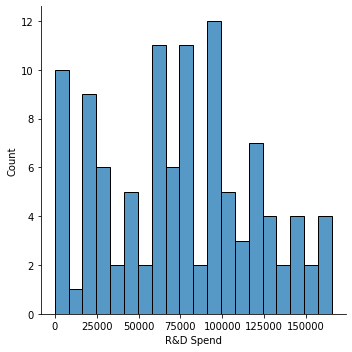

In [14]:
#Univariate Analysis
import seaborn as sn
sn.displot(data,x="R&D Spend",bins=20)

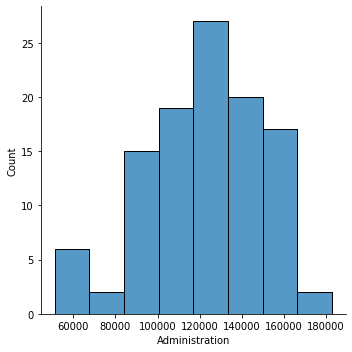

In [15]:
sn.displot(data,x="Administration")

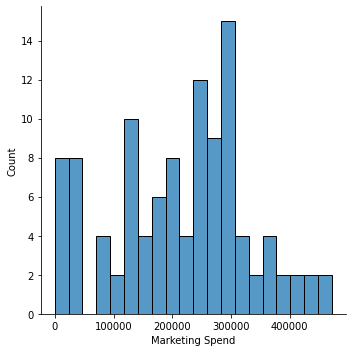

In [16]:
sn.displot(data,x="Marketing Spend",bins=20)

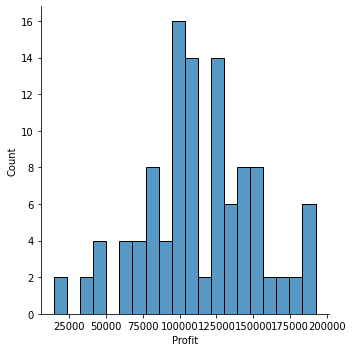

In [17]:
sn.displot(data,x="Profit",bins=20)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


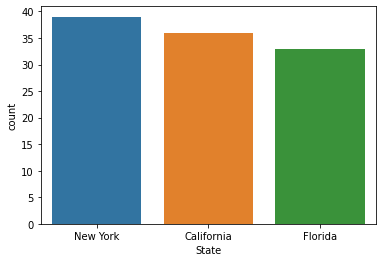

In [18]:
#Univariate analysis for categorical data
sn.countplot(data.State)

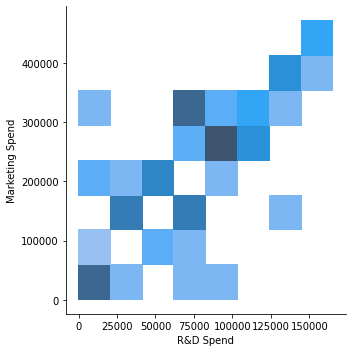

In [19]:
# Bivariate analysis
sn.displot(data,x="R&D Spend",y="Marketing Spend")

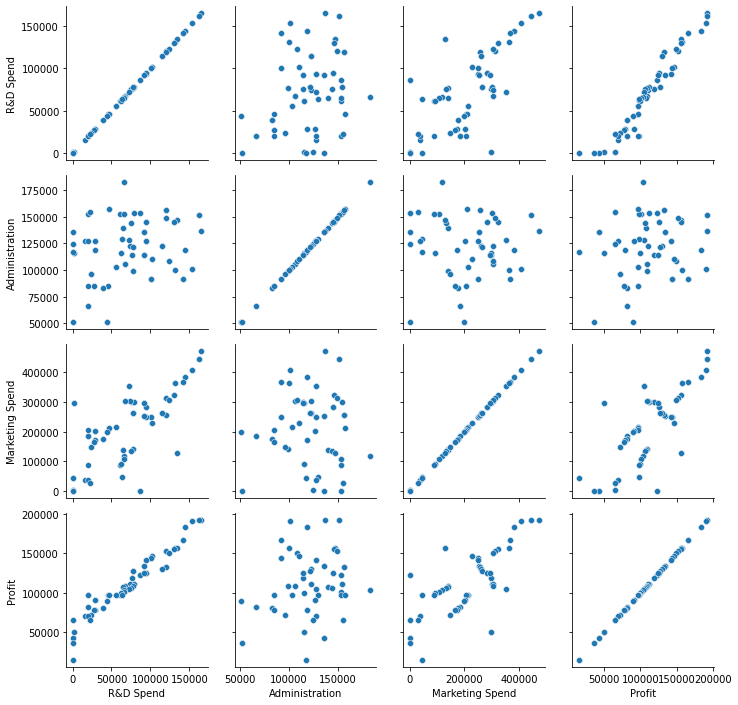

In [20]:
#Multivariate analysis
g=sn.PairGrid(data)
g.map(sn.scatterplot)

In [21]:
#Descriptive Statistics
data.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,108.000000,108.000000,108.000000,108.000000
mean,74959.338704,121750.788889,214952.664722,113523.760000
std,44996.368152,27322.385654,117937.942120,38991.013654
min,0.000000,51283.140000,0.000000,14681.400000
25%,38558.510000,105077.645000,134050.070000,90708.190000
50%,75791.365000,122699.795000,239452.750000,109543.120000
75%,101913.080000,145077.580000,298664.470000,141585.520000
max,165349.200000,182645.560000,471784.100000,192261.830000


In [22]:
# Finding missing values
data.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [24]:

import seaborn as sn


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


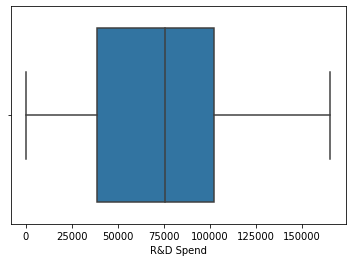

In [25]:
#finding outliers
sn.boxplot(data["R&D Spend"])

In [26]:
qnt=data.quantile(q=[0.25,0.75])
qnt

,R&D Spend,Administration,Marketing Spend,Profit
0.25,38558.51,105077.645,134050.07,90708.19
0.75,101913.08,145077.580,298664.47,141585.52


In [27]:
IQR=qnt.loc[0.75]-qnt.loc[0.25]
IQR


R&D Spend           63354.570
Administration      39999.935
Marketing Spend    164614.400
Profit              50877.330
dtype: float64

In [28]:
upperextreme=qnt.loc[0.75]+1.5*IQR
upperextreme

R&D Spend          196944.9350
Administration     205077.4825
Marketing Spend    545586.0700
Profit             217901.5150
dtype: float64

In [29]:
lowerextr=qnt.loc[0.75]-1.5*IQR
lowerextr

R&D Spend           6881.2250
Administration     85077.6775
Marketing Spend    51742.8700
Profit             65269.5250
dtype: float64

In [30]:
# Replacing The Outliers 
data["R&D Spend"]=np.where(data["R&D Spend"]>196944.9350,data["R&D Spend"].mean(),data["R&D Spend"])
# check for outliers
data[data["R&D Spend"]>196944.9350]

,R&D Spend,Administration,Marketing Spend,State,Profit


In [31]:
data["Administration"]=np.where(data["Administration"]>205077.4825,data["Administration"].mean(),data["Administration"])
# check for outliers
data[data["Administration"]>205077.4825]

,R&D Spend,Administration,Marketing Spend,State,Profit


In [32]:
data["Marketing Spend"]=np.where(data["Marketing Spend"]> 545586.0700,data["Marketing Spend"].mean(),data["Marketing Spend"])
# check for outliers
data[data["Marketing Spend"]> 545586.0700]

,R&D Spend,Administration,Marketing Spend,State,Profit


In [33]:
data["Profit"]=np.where(data["Profit"]>217901.5150,data["Profit"].mean(),data["Profit"])
# check for outliers
data[data["Profit"]>217901.5150]

,R&D Spend,Administration,Marketing Spend,State,Profit


In [34]:
catagorical=data.select_dtypes(include=['category'])
catagorical

""
0
1
2
3
4
...
103
104
105
106


In [35]:
# Encoding - One Hot
pd.get_dummies(data,columns=["State"])

,R&D Spend,Administration,Marketing Spend,Profit,State_California,State_Florida,State_New York
0,165349.20,136897.80,471784.10,192261.83,0,0,1
1,162597.70,151377.59,443898.53,191792.06,1,0,0
2,153441.51,101145.55,407934.54,191050.39,0,1,0
3,144372.41,118671.85,383199.62,182901.99,0,0,1
4,142107.34,91391.77,366168.42,166187.94,0,1,0
...,...,...,...,...,...,...,...
103,119943.24,156547.42,256512.92,132602.65,0,1,0
104,114523.61,122616.84,261776.23,129917.04,0,0,1
105,78013.11,121597.55,264346.06,126992.93,1,0,0
106,94657.16,145077.58,282574.31,125370.37,0,0,1


In [36]:
#Label Encoding
from sklearn.preprocessing import LabelEncoder
labl=LabelEncoder()

In [37]:
data["State"]=labl.fit_transform(data["State"])

In [38]:
data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,2,192261.83
1,162597.70,151377.59,443898.53,0,191792.06
2,153441.51,101145.55,407934.54,1,191050.39
3,144372.41,118671.85,383199.62,2,182901.99
4,142107.34,91391.77,366168.42,1,166187.94


In [41]:
# Spliting data into dependent and independent variables
y=data['Profit']
x=data.drop(columns=['Profit'],axis=1)
#independent variables

In [42]:
spends=x.columns
spends

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'State'], dtype='object')

In [ ]:
#dependent Variable
y

0      192261.83
1      191792.06
2      191050.39
3      182901.99
4      166187.94
         ...    
103    132602.65
104    129917.04
105    126992.93
106    125370.37
107    124266.90
Name: Profit, Length: 108, dtype: float64

In [44]:
from sklearn.preprocessing import scale

In [55]:
#Scaling continuous data
x=scale(x)
x

array([[ 2.01819092,  0.55696553,  2.18783528,  1.16731536],
       [ 1.95675646,  1.0893969 ,  1.95029024, -1.23401909],
       [ 1.75232048, -0.75766814,  1.64392865, -0.03335187],
       [ 1.54982902, -0.1132146 ,  1.43322263,  1.16731536],
       [ 1.49925539, -1.11632102,  1.28814125, -0.03335187],
       [ 1.27083396, -0.806604  ,  1.25996984,  1.16731536],
       [ 1.3319795 ,  0.93574262, -0.74312422, -1.23401909],
       [ 1.23558377,  0.87437939,  0.92787631, -0.03335187],
       [ 1.01776417,  0.99163696,  0.82340982,  1.16731536],
       [ 1.08011094, -0.48065199,  0.76691751, -1.23401909],
       [ 0.60181303, -0.4102384 ,  0.1210342 , -0.03335187],
       [ 0.57410176, -1.10165542,  0.29637694, -1.23401909],
       [ 0.4220906 ,  0.20479752,  0.29718526, -0.03335187],
       [ 0.38030758,  0.50538623,  0.32125438, -1.23401909],
       [ 1.00438367,  1.27949493,  0.35403374, -0.03335187],
       [ 0.88337621,  0.03184527,  0.39886959,  1.16731536],
       [ 0.06818346, -0.

In [56]:
#check if scaled data
x=pd.DataFrame(x,columns=spends)
x.head()

,R&D Spend,Administration,Marketing Spend,State
0,2.018191,0.556966,2.187835,1.167315
1,1.956756,1.089397,1.950290,-1.234019
2,1.752320,-0.757668,1.643929,-0.033352
3,1.549829,-0.113215,1.433223,1.167315
4,1.499255,-1.116321,1.288141,-0.033352


In [ ]:
#Splitting data into Train and Test data
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)


In [ ]:
x_train.shape

(86, 3)

In [ ]:
x_test.shape

(22, 3)